## Activity # Transformation.Modelling¶
 use the file Data_Marketing_Customer_Analysis_Round3.csv

1. check if there are highly correlated features and drop them if there are any.
2. One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity  ( Hint: check Dropfirst option).
3. for the first iteration, we will focus on the numericals data (numericals data frame) as our data source.
(optional) remove the outliers from the numerical columns.
4. X-y split (y is the target variable which is the total claim amount)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

In [6]:
dm = pd.read_csv('../Data/Data_Marketing_Customer_Analysis_Round3.csv')

In [7]:
dm

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


checking if there are highly correlated features and drop them if there are any.
## plotting the correlation heatmap

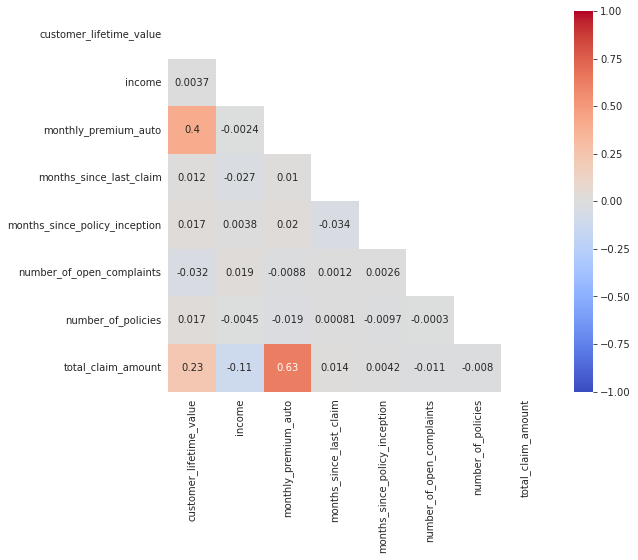

In [32]:
corr = dm.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

#One Hot/Label Encoding of the categorical variables in the categoricals data frame 
 that you created in Activity ( Hint: check Dropfirst option).

In [38]:
cat_dm = dm.select_dtypes(include=['object']).copy()
cat_val=pd.get_dummies(cat_dm, drop_first=True)
cat_val

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


# Select numerical data 

In [29]:
dm_num = dm._get_numeric_data()
dm_num = dm_num.drop(['number_of_open_complaints', 'number_of_policies' ], axis=1)
dm_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,4809,48029,61,7,52,292
1,2228,92260,64,3,26,744
2,14947,22139,100,34,31,480
3,22332,49078,97,10,3,484
4,9025,23675,117,33,31,707
...,...,...,...,...,...,...
10684,15563,61541,253,12,40,1214
10685,5259,61146,65,7,68,273
10686,23893,39837,201,11,63,381
10687,11971,64195,158,0,27,618


# X-y split (y is the target variable which is the total claim amount)

In [41]:
target_d = "total_claim_amount"
X=dm_num.drop(['total_claim_amount'], axis=1)
y=dm_num.total_claim_amount

In [52]:
X=X._get_numeric_data()
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception
0,4809,48029,61,7,52
1,2228,92260,64,3,26
2,14947,22139,100,34,31
3,22332,49078,97,10,3
4,9025,23675,117,33,31
...,...,...,...,...,...
10684,15563,61541,253,12,40
10685,5259,61146,65,7,68
10686,23893,39837,201,11,63
10687,11971,64195,158,0,27


# Data Spliting

In [44]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

# Standardize

In [47]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)
X_train.shape

(7482, 5)

In [50]:
X_test_scaled=std_scaler.transform(X_test)
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.11021627 -1.27291744 -0.67143823  0.77999322  1.36516733]
 [-0.42794064  0.74729478 -0.72925469 -0.90288055  1.68786198]
 [-0.5223013   0.26592193  0.48489091 -0.90288055  0.50464827]
 ...
 [-0.81132612 -1.17224873 -0.90270406 -1.00187313 -1.39566466]
 [ 2.25575772  0.98537142 -0.78707115  0.97797837 -1.61079442]
 [ 1.18923585  0.68583346 -0.55580532  0.87898579  0.21780858]]
--------
[[-0.40967729  1.58428551 -0.61362178  0.28503034  1.54444214]
 [-0.7597249  -0.93947257 -0.64253     1.47294124  0.755633  ]
 [ 0.57248529 -1.23371005 -0.90270406 -1.496836    0.39708339]
 ...
 [-0.79857077 -1.05867274 -0.58471355  0.87898579 -1.18053489]
 [-0.42547654 -0.97370317 -0.81597938  0.58200807 -1.61079442]
 [-0.49881985 -0.95695203  0.71615674  1.76991896 -1.00126009]]


# Apply Linear Regression
# Modeling using Statsmodels

In [56]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     1040.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:12:26   Log-Likelihood:                -51169.
No. Observations:                7482   AIC:                         1.023e+05
Df Residuals:                    7476   BIC:                         1.024e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.0597      2.612    165.779      0.0

In [57]:
predictions_test

array([267.2580649 , 350.75076754, 297.21455993, ..., 366.36943103,
       317.39441425, 606.96497882])

In [62]:
print(model.rsquared_adj)

0.4098266250385173


# Modeling using Scikit Learn
# Model fitting

In [63]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

# model parameters (b1,b2,b3,b4)

In [67]:
model.coef_

array([ -6.73206342, -33.11725893, 187.88680342,   1.93370336,
        -0.87551921])

In [68]:
model.intercept_

433.0597433841219

In [72]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [73]:
y_pred

array([267.2580649 , 350.75076754, 297.21455993, ..., 366.36943103,
       317.39441425, 606.96497882])

# Model Validation

In [78]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

In [79]:
y_pred

array([267.2580649 , 350.75076754, 297.21455993, ..., 366.36943103,
       317.39441425, 606.96497882])

In [81]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

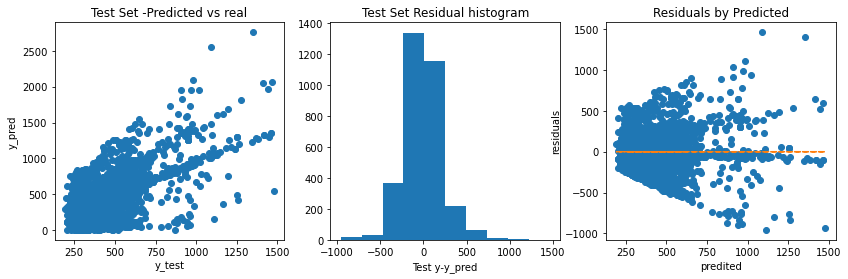

In [82]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

# using seaborn

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

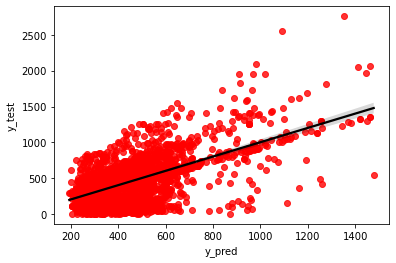

In [83]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

# Error metrics

# MSE

In [85]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

49355.42736294486
151.89226829209807


In [86]:
##prediction on the train set
mse(y_train,y_pred_train)

51016.22118765793

# RMSE

In [106]:
rmse = mse(y_train,y_pred_train, squared = False)
rmse

225.8677072705568

# MAE mean absolute error

In [112]:
mae(y_pred_train, y_train)

153.10235288740222

# R2

In [113]:
R2=r2_score(y_test,y_pred)
R2

0.4083148964314819

# Adjusted R2

In [116]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)

In [117]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.40739067727564227

# getting the number of parameters

In [119]:
X_test.shape[1]

5

# Feature Importance.

In [121]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [122]:
features_importances

,Attribute,Importance
2,monthly_premium_auto,187.886803
1,income,33.117259
0,customer_lifetime_value,6.732063
3,months_since_last_claim,1.933703
4,months_since_policy_inception,0.875519


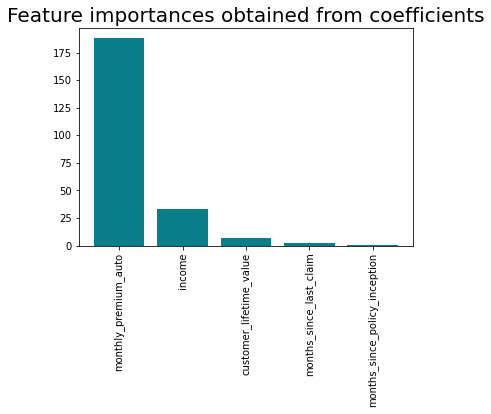

In [123]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()